Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


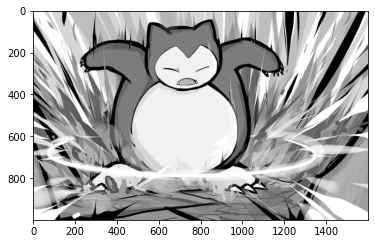

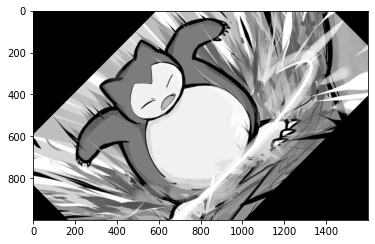

In [2]:
# Import drive from google.colab package
from google.colab import drive
# Import os and sys modules
import os, sys

# Mount Google Drive
drive.mount('/content/drive')
# Assume a folder "images" has been created, go to the folder "images"
os.chdir('/content/drive/My Drive/images')
# Add the path for interpreter to search
sys.path.append('/content/drive/My Drive/images')

# Import all the required libraries
import cv2, math; import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('snorlax.png')  # Read the image
# Convert the color image to gray and show it
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(); plt.imshow(grayImg, cmap='gray', vmin=0, vmax=1)

# Find the shape of image
rows, cols = grayImg.shape

# Form the transformation matrix of rotation
# The angle for math.sin and math.cos should be in radian.
# 45 degree = pi/4 radian
angle = math.pi/4
M = np.float32([[math.cos(angle), math.sin(angle), 
      -(cols//2)*math.cos(angle)-(rows//2)*math.sin(angle) + (cols//2)], 
                [-math.sin(angle), math.cos(angle), 
      (cols//2)*math.sin(angle)-(rows//2)*math.cos(angle) + (rows//2)]])
      
# Another way to generate the required transformation matrix
# The angle for getRotationMatrix2D should be in degree
# M = cv2.getRotationMatrix2D((cols//2,rows//2), 45, 1.0)

# Perform the transformation
rotate45 = cv2.warpAffine(grayImg, M, (cols,rows))
plt.figure(); plt.imshow(rotate45, cmap='gray', vmin=0, vmax=1)